In [2]:
!pip install apyori -q

  Preparing metadata (setup.py) ... done


In [3]:
import pandas as pd
import numpy as np
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Load

In [4]:
grocery_path = "/content/drive/MyDrive/PG Thappar - CSE/Data Science Foundation/DSF-Labs/Apriori/Groceries data.csv"
basket_path = "/content/drive/MyDrive/PG Thappar - CSE/Data Science Foundation/DSF-Labs/Apriori/basket.csv"

In [5]:
grocery = pd.read_csv(grocery_path)
basket = pd.read_csv(basket_path)

print(grocery.shape, basket.shape)

(38765, 7) (14963, 11)


In [6]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


## ARM

In [ ]:
grocery.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [ ]:
df = grocery.groupby(['Member_number', 'Date'])['itemDescription'].apply(','.join).reset_index()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    14963 non-null  int64 
 1   Date             14963 non-null  object
 2   itemDescription  14963 non-null  object
dtypes: int64(1), object(2)
memory usage: 350.8+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.day_name()

df.head()

,Member_number,Date,itemDescription,Year,Month,Day,WeekDay
0,1000,2014-06-24,"whole milk,pastry,salty snack",2014,6,24,Tuesday
1,1000,2015-03-15,"sausage,whole milk,semi-finished bread,yogurt",2015,3,15,Sunday
2,1000,2015-05-27,"soda,pickled vegetables",2015,5,27,Wednesday
3,1000,2015-07-24,"canned beer,misc. beverages",2015,7,24,Friday
4,1000,2015-11-25,"sausage,hygiene articles",2015,11,25,Wednesday


#### Top customers

In [ ]:
top_customers = df.groupby(('Member_number')).count()['Date'].sort_values(ascending=False).head(10)
top_customers.name = 'order_count'
top_customers

Member_number
2271    11
1379    11
4338    11
3737    11
2193    11
3593    10
1052    10
2625    10
3484    10
4217    10
Name: order_count, dtype: int64

In [ ]:
# Yearly
top_customers = df.groupby(['Member_number', 'Year']).count()['Date'].sort_values(ascending=False).head(10)
top_customers.name = 'order_count'
top_customers

Member_number  Year
1169           2014    9
1410           2014    8
1908           2014    8
3248           2014    8
4933           2014    7
4137           2014    7
4272           2014    7
2758           2014    7
1740           2014    7
2907           2014    7
Name: order_count, dtype: int64

In [ ]:
# Monthly
top_customers = df.groupby(['Member_number', 'Month']).count()['Date'].sort_values(ascending=False).head(10)
top_customers.name = 'order_count'
top_customers

Member_number  Month
4683           9        5
4202           2        5
2524           10       5
4721           6        4
2191           10       4
4137           12       4
3284           1        4
4376           7        4
3393           2        4
4526           8        4
Name: order_count, dtype: int64

### Period getting Most orders

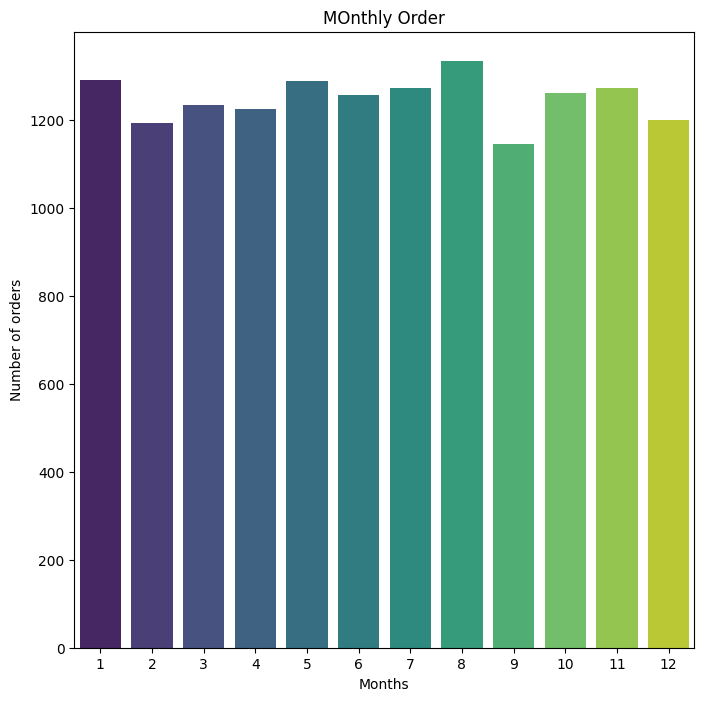

In [ ]:
# Analysing montly orders (basket)
top_months = df.groupby(['Month']).count()['Date']
top_months.name = 'order_count'
top_months=top_months.reset_index()


plt.figure(figsize= (8,8))
sns.barplot(top_months, x = "Month",y = "order_count", palette = 'viridis')
plt.xlabel("Months")
plt.ylabel("Number of orders")
plt.title("MOnthly Order")
plt.show()

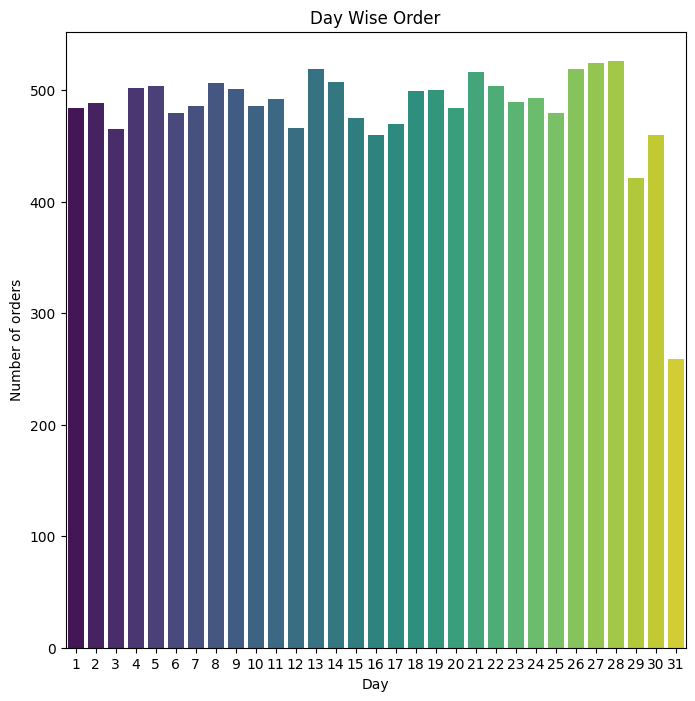

In [ ]:
# Analysing Date wise orders (basket)
top_days = df.groupby(['Day']).count()['Date']
top_days.name = 'order_count'
top_days=top_days.reset_index()


plt.figure(figsize= (8,8))
sns.barplot(top_days, x = "Day",y = "order_count", palette = 'viridis')
plt.xlabel("Date")
plt.ylabel("Number of orders")
plt.title("Day Wise Order")
plt.show()

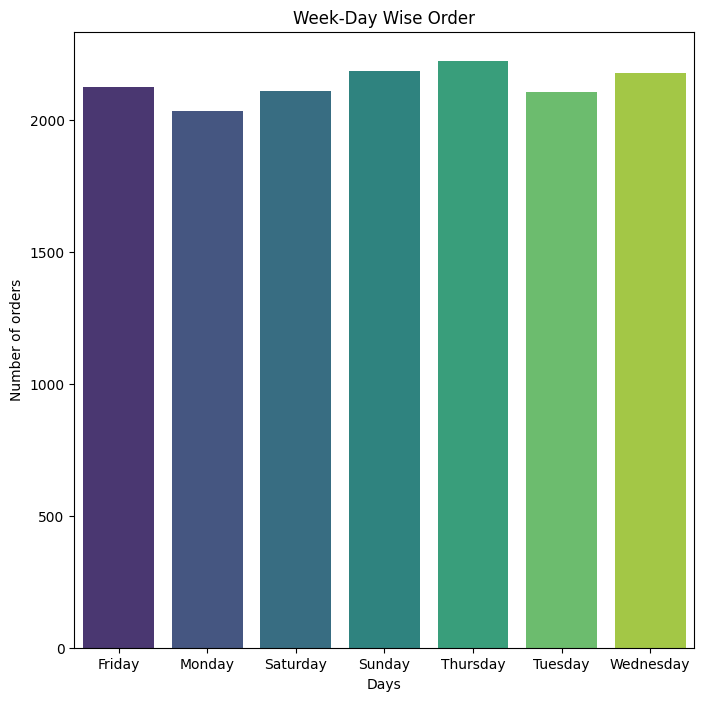

In [ ]:
# Analysing Week-Day orders (basket)
top_days = df.groupby(['WeekDay']).count()['Date']
top_days.name = 'order_count'
top_days=top_days.reset_index()

plt.figure(figsize= (8,8))
sns.barplot(top_days, x = "WeekDay",y = "order_count", palette = 'viridis')
plt.xlabel("Days")
plt.ylabel("Number of orders")
plt.title("Week-Day Wise Order")
plt.show()

#### Items sold most


In [ ]:
item_order = grocery.groupby(['itemDescription']).count()['Member_number']
item_order.name='order_count'
item_order.sort_values(ascending=False).reset_index()

,itemDescription,order_count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,preservation products,1


In [ ]:
grocery.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


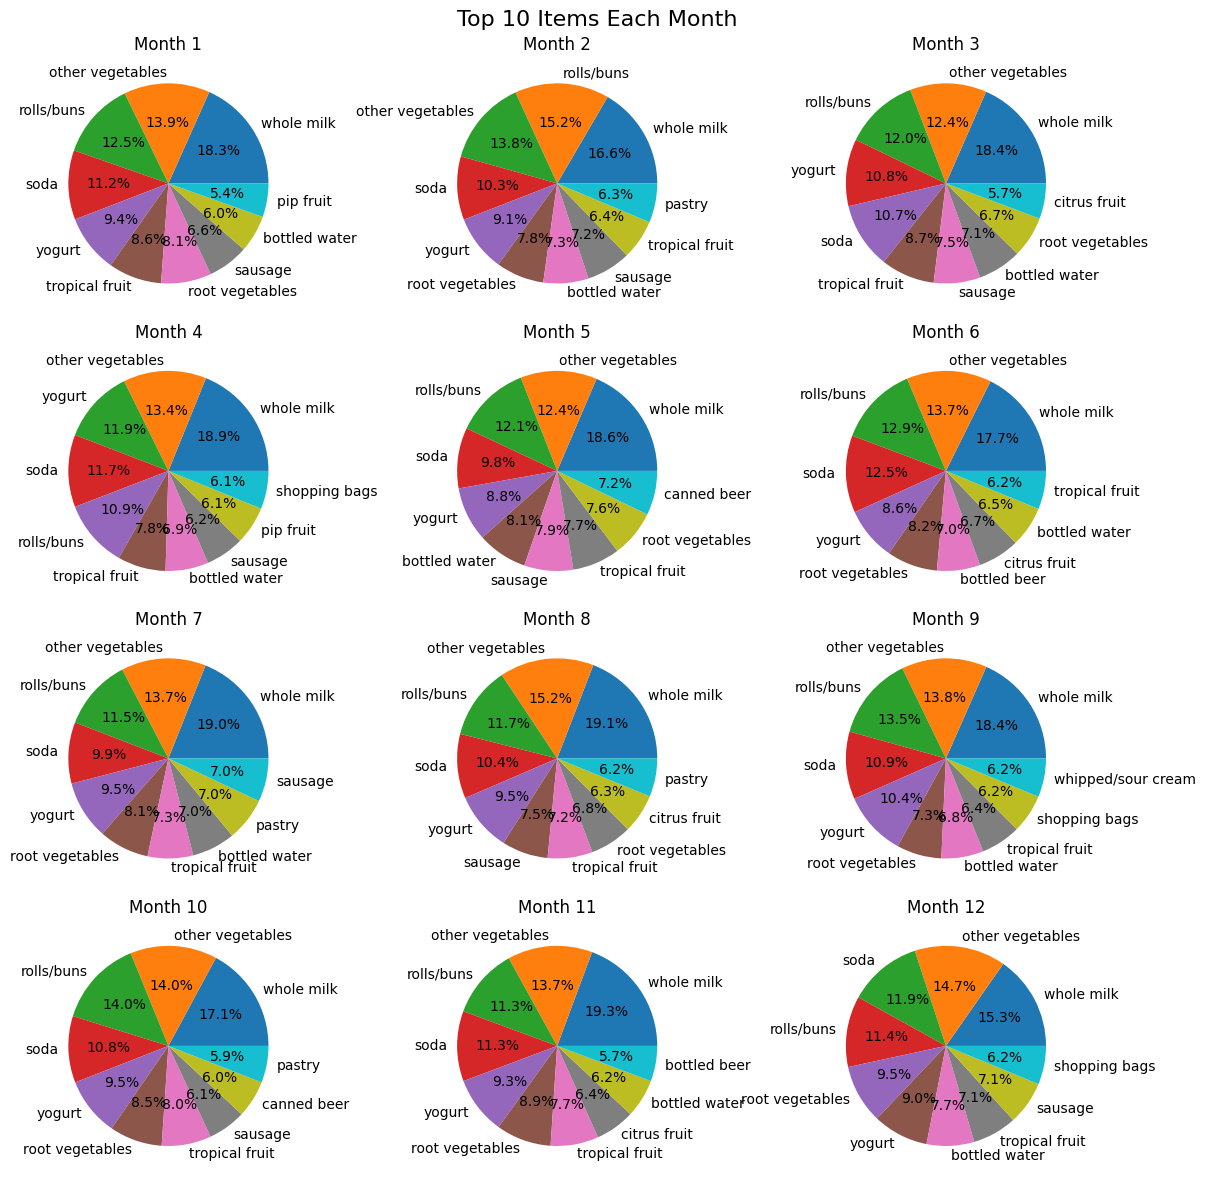

In [ ]:
# Group by 'Month' and 'itemDescription' and count the occurrences
month_item_counts = grocery.groupby(['month', 'itemDescription']).size().unstack(fill_value=0)

# Create subplots with 3x4 layout for 12 plots (one for each month)
fig, axs = plt.subplots(4, 3, figsize=(12, 12))
fig.suptitle("Top 10 Items Each Month", fontsize=16)

for month in range(1, 13):  # Assuming data spans 12 months
    items = month_item_counts.loc[month]
    total_count = items.sum()

    # Get the top 10 items for this month
    top_10_items = items.nlargest(10)

    # Create a pie plot for the current month
    ax = axs[(month - 1) // 3, (month - 1) % 3]
    ax.pie(top_10_items, labels=top_10_items.index, autopct='%1.1f%%', )
    ax.set_title(f"Month {month}")



# Adjust layout and show the subplots
plt.tight_layout()
plt.show()

### Apriori

In [ ]:
basket.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transactions = basket.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
transactions[:5]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles']]

In [ ]:
rules = apr(transactions)
df_rules = pd.DataFrame(list(rules))
df_rules.head()

,items,support,ordered_statistics
0,(other vegetables),0.122101,"[((), (other vegetables), 0.12210118291786407,..."
1,(rolls/buns),0.110005,"[((), (rolls/buns), 0.11000467820624206, 1.0)]"
2,(whole milk),0.157923,"[((), (whole milk), 0.15792287642852368, 1.0)]"


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_bin = te.fit_transform(transactions)
Transactions = pd.DataFrame(te_bin, columns = te.columns_, dtype=int)

Transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Frequent_itemset = apriori(Transactions, min_support = 0.002, use_colnames = True)
Frequent_itemset.head()

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.008087,(baking powder)
3,0.033950,(beef)
4,0.021787,(berries)


In [ ]:
rules = association_rules(Frequent_itemset, metric = "lift", min_threshold = 1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(berries),0.122101,0.021787,0.002673,0.021894,1.004899,1.303311e-05,1.000109,0.005553
1,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,1.303311e-05,1.000682,0.004984
2,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,6.070623e-04,1.014464,0.190292
3,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,6.070623e-04,1.010649,0.193337
4,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,6.406768e-04,1.014394,0.279398
5,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,6.406768e-04,1.018191,0.276701
6,(pastry),(brown bread),0.051728,0.037626,0.002005,0.038760,1.030127,5.863558e-05,1.001179,0.030841
7,(brown bread),(pastry),0.037626,0.051728,0.002005,0.053286,1.030127,5.863558e-05,1.001646,0.030389
8,(rolls/buns),(chocolate),0.110005,0.023592,0.002807,0.025516,1.081592,2.117455e-04,1.001975,0.084761
9,(chocolate),(rolls/buns),0.023592,0.110005,0.002807,0.118980,1.081592,2.117455e-04,1.010188,0.077260


In [ ]:
sorted_rules = rules.sort_values(by ="lift", ascending = False)
sorted_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531,0.319493
12,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814,0.328559
5,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,0.000641,1.018191,0.276701
4,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,0.000641,1.014394,0.279398
21,(frozen vegetables),(sausage),0.028002,0.060349,0.002072,0.073986,1.225966,0.000382,1.014726,0.189627
20,(sausage),(frozen vegetables),0.060349,0.028002,0.002072,0.034330,1.225966,0.000382,1.006553,0.196155
2,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,0.000607,1.014464,0.190292
3,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,0.000607,1.010649,0.193337
15,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
14,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
